In [1]:
# Add parent directory to path for imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

In [2]:
from agricultural_csp.instance import *
from agricultural_csp.evaluator import *
from agricultural_csp.solver.agcsp_ts import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [3]:
from agricultural_csp.tools import display_grid_and_path

In [4]:
# Create a 50 x 50 square grid with five small square obstacles scattered on the grid
obstacle_half_size = 2  # Half-size of each small square obstacle

r_grid, c_grid = np.mgrid[0:50, 0:50]
grid_nodes = np.argwhere((r_grid >= 0) & (r_grid < 50) & (c_grid >= 0) & (c_grid < 50))

# Create five small square obstacles at different positions on the grid
obstacle_positions = [
    (10, 10),  # Top-left area
    (10, 40),  # Top-right area
    (25, 25),  # Center
    (40, 10),  # Bottom-left area
    (40, 40)   # Bottom-right area
]

obstacle_list = []
for obs_r, obs_c in obstacle_positions:
    obstacle = np.argwhere(
        (np.abs(r_grid - obs_r) <= obstacle_half_size) & 
        (np.abs(c_grid - obs_c) <= obstacle_half_size)
    )
    obstacle_list.append(obstacle)

obstacle_nodes = np.vstack(obstacle_list)
instance = AgcspInstance(grid_nodes, obstacle_nodes, 5, 90)

""" instance = AgcspInstance(grid_nodes, np.array([]), 5, 90) """
evaluator = AgcspEvaluator(instance)


Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1501 nós)


Coverage: 0/2375 nodes (0.0%)
Obstacles: 0/125 covered


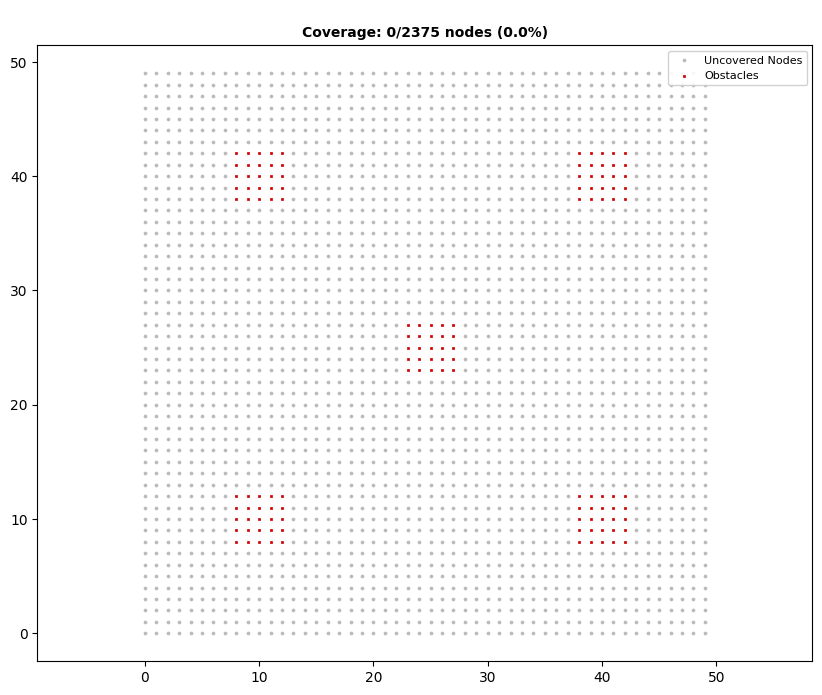

In [5]:
display_grid_and_path(inst=instance, evaluator=evaluator, path=[])

In [6]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[5, 1, 5], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=300)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Visitou (np.int64(0), np.int64(0)), cobriu 7 novos nós. 2107 restantes.
Heurística 'Set Cover': Iniciando. 2107 alvos restantes.
  Visitou (np.int64(2), np.int64(2)), cobriu 14 novos nós. 2093 restantes.
  Visitou (np.int64(5), np.int64(2)), cobriu 15 novos nós. 2078 restantes.
  Visitou (np.int64(8), np.int64(2)), cobriu 15 novos nós. 2063 restantes.
  Visitou (np.int64(11), np.int64(2)), cobriu 15 novos nós. 2048 restantes.
  Visitou (np.int64(14), np.int64(2)), cobriu 15 novos nós. 2033 restantes.
  Visitou (np.int64(17), np.int64(2)), cobriu 15 novos nós. 2018 restantes.
  Visitou (np.int64(20), np.int64(2)), cobriu 15 novos nós. 2003 restantes.
  Visitou (np.int64(23), np.int64(2)), cobriu 15 novos nós. 1988 restantes.
  Visitou (np.int64(26), np.int64(2)), cobriu 15 novos nós. 1973 restantes.
  Visitou (np.int64(29), np.int64(2)), cobriu 15 novos nós. 1958 restantes.
  Visitou (np.int64(32), np.int64(2)), cobriu 15 novos nós. 1943 restantes.
  Visitou (np.int64(35), np.int64(2)

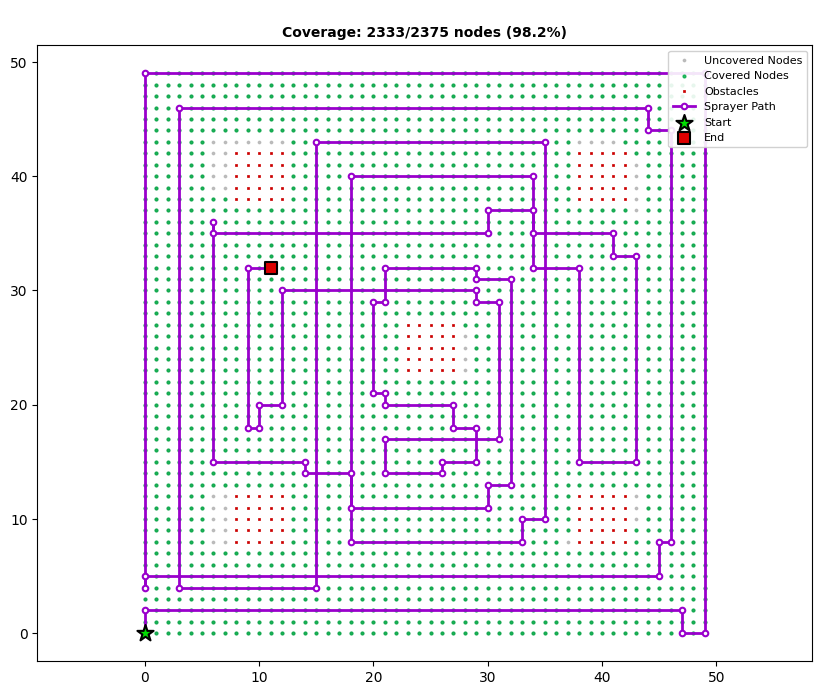

In [7]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [8]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 932.54
-----------------------------------------------------------
Iteration 0: Best ObjFun = 932.54, Current ObjFun = 932.54
Applying move: insert with args ((np.int64(41), np.int64(47)), 75)
Iteration 1: Best ObjFun = 932.54, Current ObjFun = 965.56
Applying move: insert with args ((np.int64(28), np.int64(40)), 75)
Iteration 2: Best ObjFun = 932.54, Current ObjFun = 964.93
Applying move: insert with args ((np.int64(49), np.int64(38)), 77)
Iteration 3: Best ObjFun = 932.54, Current ObjFun = 977.11
Applying move: insert with args ((np.int64(45), np.int64(6)), 78)
Iteration 4: Best ObjFun = 932.54, Current ObjFun = 1008.43
Applying move: insert with args ((np.int64(46), np.int64(20)), 78)
Iteration 5: Best ObjFun = 932.54, Current ObjFun = 1007.87

=== Trocando para Fase 2 (Objetivo: Otimizar C2) ===
Iteration 6: Best ObjFun = 932.54, Current ObjFun =

Coverage: 2346/2375 nodes (98.8%)
Obstacles: 0/125 covered


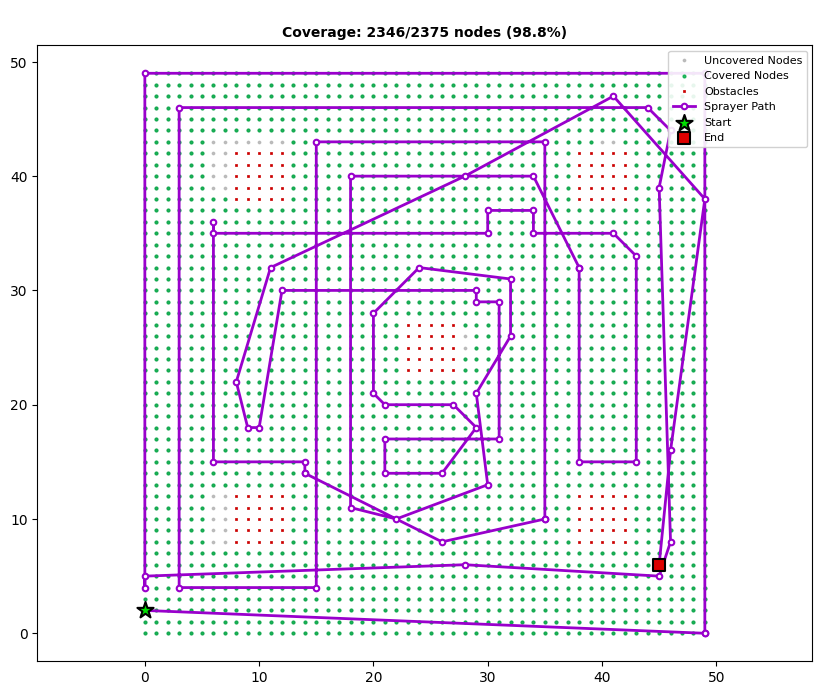

In [9]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [10]:
solution.cache["hits_obstacle"]

np.False_

In [11]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[10, 10, 10], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_time_secs=1800)
debug_options = DebugOptions(verbose=False)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Visitou (np.int64(0), np.int64(0)), cobriu 7 novos nós. 2107 restantes.
Heurística 'Set Cover': Iniciando. 2107 alvos restantes.
  Visitou (np.int64(2), np.int64(2)), cobriu 14 novos nós. 2093 restantes.
  Visitou (np.int64(5), np.int64(2)), cobriu 15 novos nós. 2078 restantes.
  Visitou (np.int64(8), np.int64(2)), cobriu 15 novos nós. 2063 restantes.
  Visitou (np.int64(11), np.int64(2)), cobriu 15 novos nós. 2048 restantes.
  Visitou (np.int64(14), np.int64(2)), cobriu 15 novos nós. 2033 restantes.
  Visitou (np.int64(17), np.int64(2)), cobriu 15 novos nós. 2018 restantes.
  Visitou (np.int64(20), np.int64(2)), cobriu 15 novos nós. 2003 restantes.
  Visitou (np.int64(23), np.int64(2)), cobriu 15 novos nós. 1988 restantes.
  Visitou (np.int64(26), np.int64(2)), cobriu 15 novos nós. 1973 restantes.
  Visitou (np.int64(29), np.int64(2)), cobriu 15 novos nós. 1958 restantes.
  Visitou (np.int64(32), np.int64(2)), cobriu 15 novos nós. 1943 restantes.
  Visitou (np.int64(35), np.int64(2)

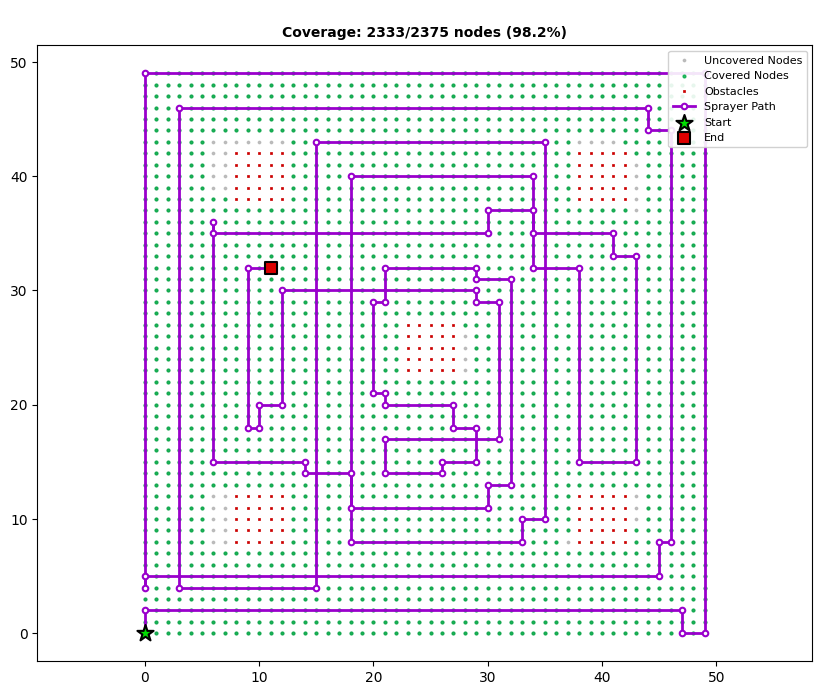

In [12]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [13]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 932.54
-----------------------------------------------------------


Coverage: 2367/2375 nodes (99.7%)
Obstacles: 0/125 covered


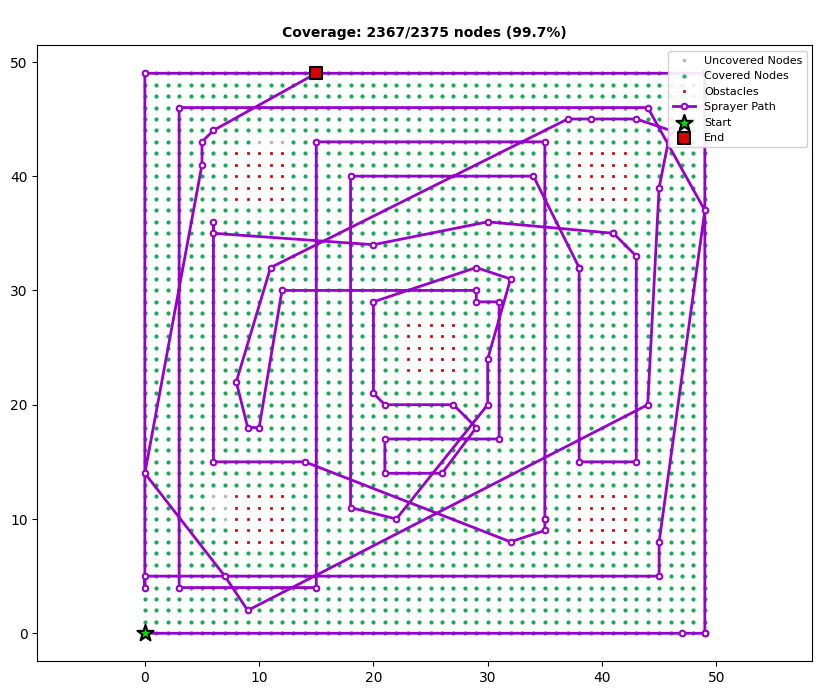

In [14]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [15]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.BOUSTROPHEDON_SEGMENTED,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[5, 1, 5], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=200)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Iniciando em (np.int64(0), np.int64(2))
Coverage: 1500/2375 nodes (63.2%)
Obstacles: 0/125 covered


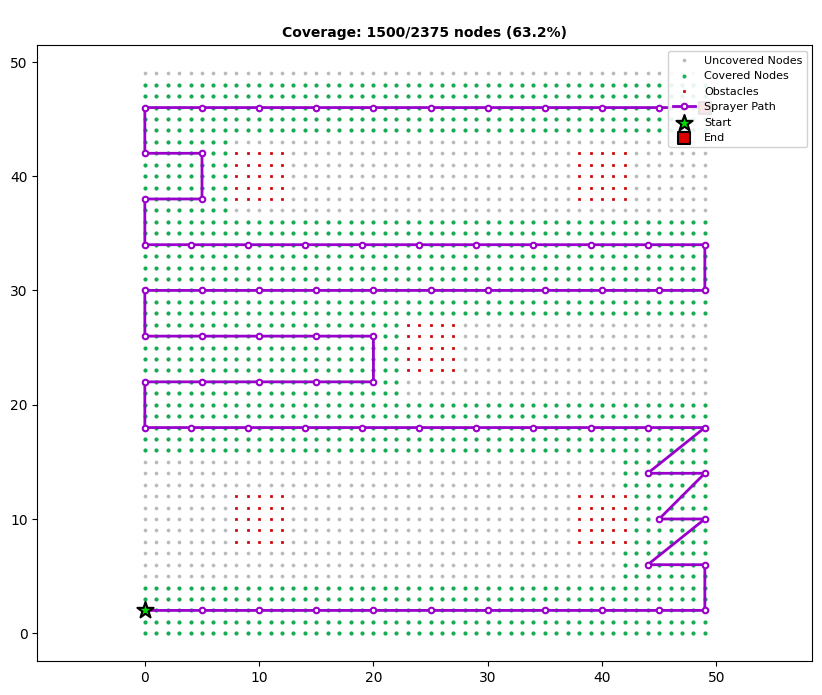

In [16]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [17]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 939.00
-----------------------------------------------------------
Iteration 0: Best ObjFun = 939.00, Current ObjFun = 939.00
Applying move: move with args (0, array([0, 7]))
Iteration 1: Best ObjFun = 935.04, Current ObjFun = 935.04
Applying move: insert with args ((np.int64(13), np.int64(47)), 67)
Iteration 2: Best ObjFun = 933.36, Current ObjFun = 933.36
Applying move: move with args (6, array([30,  6]))
Iteration 3: Best ObjFun = 927.91, Current ObjFun = 927.91
Applying move: remove with args (5,)
Iteration 4: Best ObjFun = 926.22, Current ObjFun = 926.22
Applying move: move with args (72, array([40, 49]))
Iteration 5: Best ObjFun = 926.22, Current ObjFun = 928.07
Applying move: move with args (7, array([40,  5]))

=== Trocando para Fase 2 (Objetivo: Otimizar C2) ===
Iteration 6: Best ObjFun = 926.22, Current ObjFun = 928.31
Applying move: remove

Applying move: move with args (3, array([10,  2]))

=== Trocando para Fase 3 (Objetivo: Otimizar C3) ===
Iteration 18: Best ObjFun = 902.75, Current ObjFun = 902.75
Applying move: remove with args (65,)
Iteration 19: Best ObjFun = 902.53, Current ObjFun = 902.53
Applying move: move with args (29, array([ 0, 22]))
Iteration 20: Best ObjFun = 901.53, Current ObjFun = 901.53
Applying move: move with args (36, array([ 0, 26]))
Iteration 21: Best ObjFun = 900.53, Current ObjFun = 900.53
Applying move: move with args (34, array([20, 26]))
Iteration 22: Best ObjFun = 899.53, Current ObjFun = 899.53
Applying move: remove with args (45,)

=== Trocando para Fase 1 (Objetivo: Otimizar C1) ===
Iteration 23: Best ObjFun = 895.92, Current ObjFun = 895.92
Applying move: move with args (52, array([24, 38]))
Iteration 24: Best ObjFun = 886.04, Current ObjFun = 886.04
  >>> MOVE ACEITO (Swap): Indices (0, 30). Delta Total: 7.0972
Applying move: swap with args (0, 30)
Iteration 25: Best ObjFun = 886.04, 

Coverage: 2316/2375 nodes (97.5%)
Obstacles: 0/125 covered


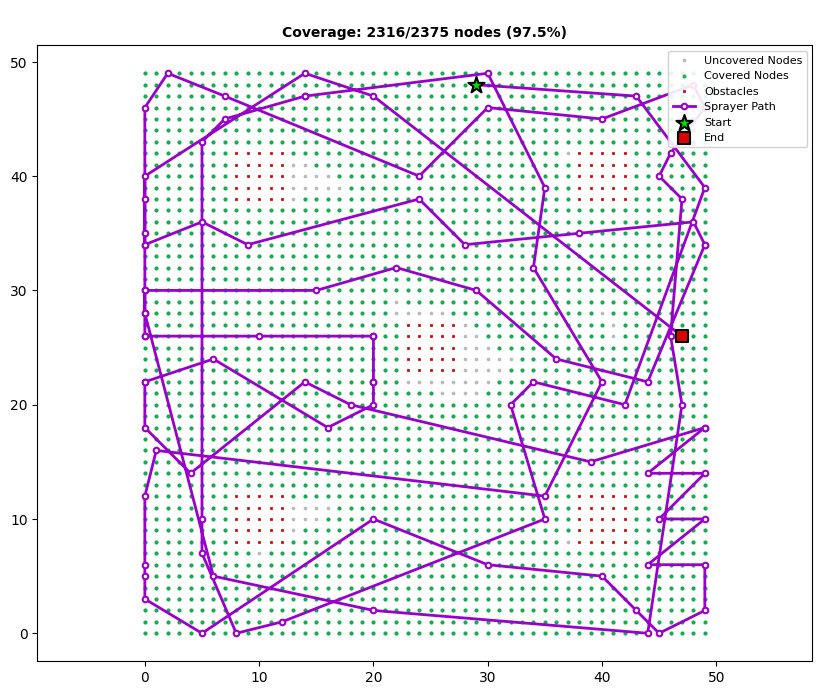

In [18]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)